In [1]:
pwd

'C:\\Users\\home pc\\Downloads\\Study_Folder\\Python_Folder'

------------------------------
HEAD
------------------------------
   id  cases
0   1     27
1   2     27
2   3     27
3   4     44
4   5     44
------------------------------
PREPARE DATA
------------------------------
[[1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00]
 [1.0000000e+00 3.0000000e+00 9.0000000e+00 2.7000000e+01]
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 6.4000000e+01]
 [1.0000000e+00 5.0000000e+00 2.5000000e+01 1.2500000e+02]
 [1.0000000e+00 6.0000000e+00 3.6000000e+01 2.1600000e+02]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02]
 [1.0000000e+00 8.0000000e+00 6.4000000e+01 5.1200000e+02]
 [1.0000000e+00 9.0000000e+00 8.1000000e+01 7.2900000e+02]
 [1.0000000e+00 1.0000000e+01 1.0000000e+02 1.0000000e+03]
 [1.0000000e+00 1.1000000e+01 1.2100000e+02 1.3310000e+03]
 [1.0000000e+00 1.2000000e+01 1.4400000e+02 1.7280000e+03]
 [1.0000000e+00 1.3000000e+01 1.6900000e+02 2.1970000e+03]
 [1.0000000e+

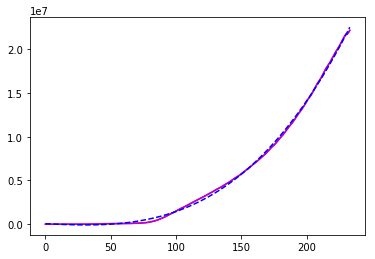

------------------------------
PREDICTION
------------------------------
Prediction - Cases after 15 days:27.21 Million


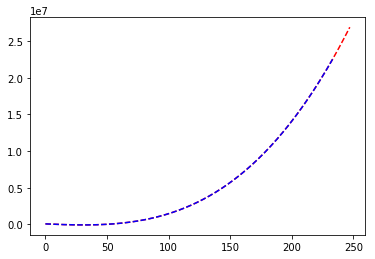

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


''' LOAD THE DATA'''

data = pd.read_csv("coronaCases.csv",sep=',')
data = data[['id','cases']]
print('-'*30)
print("HEAD")
print('-'*30)
print(data.head())


'''PREPARE DATA '''

print('-'*30)
print("PREPARE DATA")
print('-'*30)
x =np.array(data['id']).reshape(-1,1)
y =np.array(data['cases']).reshape(-1,1)
plt.plot(y,'-m')
#plt.show()

polyFeature = PolynomialFeatures(degree=3)
x = polyFeature.fit_transform(x)
print(x)

'''TRAINING THE DATA'''

print('-'*30)
print("TRAINING THE DATA")
print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,2)}%')

y0= model.predict(x)
plt.plot(y,'-m')
plt.plot(y0,'--b')
plt.show()


"""PREDECTION"""

days = 15
print('-'*30)
print('PREDICTION')
print('-'*30)
print(f'Prediction - Cases after {days} days:',end='')
print(round(int(model.predict(polyFeature.fit_transform([[234+days]])))/1000000,2),'Million')

x1 = np.array(list(range(1,234+days))).reshape(-1,1)
y1 = model.predict(polyFeature.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y0,'--b')
plt.show()



